### 유방암 과제 
- 차원축소 ) 10>5>2 차원으로 
- 분류정확도 비교 ) 원본,2,5,10
- 2차원은 시각화 
- 군집화 
- 군집화 성능평가


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer
br = load_breast_cancer()

- 정규화

In [4]:
from sklearn.preprocessing import StandardScaler
br_std = StandardScaler().fit_transform(br.data)

- 차원축소 

In [5]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
pca2 = PCA(n_components=5)
pca3 = PCA(n_components=10)

In [6]:
br_pca1 = pca1.fit_transform(br_std)
br_pca2 = pca2.fit_transform(br_std)
br_pca3 = pca3.fit_transform(br_std)

- 차원축소 설명력

In [25]:
pca1.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [26]:
pca2.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

In [27]:
pca3.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

- 2차원만 시각화

In [29]:
df= pd.DataFrame(br.data, columns=br.feature_names)
df['target'] = br.target
df['PC1'] = br_pca2[:,0]
df['PC2'] = br_pca2[:,1]
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,PC1,PC2
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,9.192837,1.948583
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,2.387802,-3.768172
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,5.733896,-1.075174


IndexError: index 2 is out of bounds for axis 0 with size 2

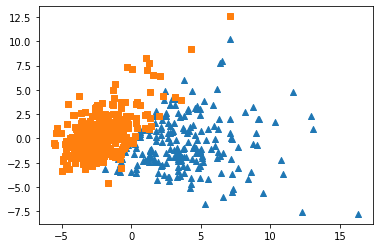

In [35]:
markers = ['^','s','o']             # 왜 에러가? 

for i, marker in enumerate(markers):
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker= marker, label = br.target_names[i])

plt.legend()
plt.xlabel('PC1');plt.ylabel('PC2')
plt.show()

- 분류정확도 비교 

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [8]:
# 오리지널 
X_train, X_test, y_train, y_test = train_test_split(
    br.data, br.target, stratify=br.target, random_state=2021
)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9790209790209791

In [11]:
# 2차원
X_train, X_test, y_train, y_test = train_test_split(
        br_pca1, br.target, stratify=br.target, random_state=2021
)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.9370629370629371


In [12]:
# 5차원
X_train, X_test, y_train, y_test = train_test_split(
        br_pca2, br.target, stratify=br.target, random_state=2021
)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.958041958041958


In [13]:
# 10차원
X_train, X_test, y_train, y_test = train_test_split(
        br_pca3, br.target, stratify=br.target, random_state=2021
)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.972027972027972


In [ ]:
# 차원축소 분류평가 반복문
for i in range(1,4):
    X_train, X_test, y_train, y_test = train_test_split(
        f'br_pca{i}', br.target, stratify=br.target, random_state=2021
    )
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    print(rf.score(X_test, y_test))


ValueError: Found input variables with inconsistent numbers of samples: [7, 569]

- 군집화

In [31]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=2,random_state = 2021)
kmeans.fit(br_std)

KMeans(n_clusters=2, random_state=2021)

In [32]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

- 군집화 성능평가

In [ ]:
# 차원 여러개 분류 평가할 때 반복문 or 이렇게 함수를 만들어서 

def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=2021
)
rf = RandomForestClassifier(random_state=2021)
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
return np.round(score,4)

In [ ]:
print('PCA 2 정확도:', pca_accuracy(X,y는 알아서 작성))

- globals() : 전역 변수를 딕셔너리에 담아두기 

In [ ]:
for dim in [2,5,10]:
    globals()[f'pca{dim}']PCA(n_components=dim)
    globals()[f'cancer_pca{dim}'] = globals()[f'pca{dim}'].fit_transform(cancer_std)
    acc = pda_accuracy(globals()[f'cancer_pca{dim}'], cancer.target)
    print(f'PCA {dim} 정확도: {acc}')